## Running a Random Forest

***

### Project Description

The second assignment deals with Random Forests. Random forests are predictive models that allow for a data driven exploration of many explanatory variables in predicting a response or target variable. Random forests provide importance scores for each explanatory variable and also allow you to evaluate any increases in correct classification with the growing of smaller and larger number of trees.

Run a Random Forest. 

You will need to perform a random forest analysis to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| incomeperperson|	2010 Gross Domestic Product per capita in constant 2000 US$.|
| alcconsumption|	2008 alcohol consumption per adult (age 15+), litres|
| armedforcesrate|	Armed forces personnel (% of total labor force)|
| breastcancerper100TH|	2002 breast cancer new cases per 100,000 female|
| co2emissions|	2006 cumulative CO2 emission (metric tons)|
| femaleemployrate|	2007 female employees age 15+ (% of population)|
| employrate|	2007 total employees age 15+ (% of population)|
| HIVrate|	2009 estimated HIV Prevalence %|
| Internetuserate|	2010 Internet users (per 100 people)|
| lifeexpectancy|	2011 life expectancy at birth (years)|
| oilperperson|	2010 oil Consumption per capita (tonnes per year and person)|
| polityscore|	2009 Democracy score (Polity)|
| relectricperperson|	2008 residential electricity consumption, per person (kWh)|
| suicideper100TH|	2005 Suicide, age adjusted, per 100 000|
| urbanrate|	2008 urban population (% of total)|

## Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# import shap
# import statsmodels.api as sm
# import datetime
# from datetime import datetime, timedelta
# import scipy.stats
# import pandas_profiling
# from pandas_profiling import ProfileReport
# import graphviz

# import xgboost as xgb
# from xgboost import XGBClassifier, XGBRegressor
# from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
#sns.set_style('dark')
#sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2

#from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

np.random.seed(0)

#from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.option_context('float_format', '{:.2f}'.format)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("gapminderfinal6.csv")

In [3]:
df

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat,politycat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0,0.155844,0
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3,0.101449,1
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0,0.101449,1
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4,0.155844,1
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2,0.101449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,722.81,3.91,1.09,16,1425.0,67.60,0.40,28,75,1.48,-7,302.73,12,71.00,27.84,0,3,1,1,0.101449,0
209,8740.97,6.69,5.94,37,14.0,11.30,1.94,36,73,1.48,4,1173.18,10,32.00,71.90,2,0,3,2,0.155844,1
210,610.36,0.20,2.32,35,235.0,20.30,1.94,12,65,1.48,-2,130.06,6,39.00,30.64,1,2,0,0,0.101449,0
211,432.23,3.56,0.34,13,132.0,53.50,13.50,10,49,1.48,7,168.62,12,61.00,35.42,3,2,0,1,0.101449,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   incomeperperson       213 non-null    float64
 1   alcconsumption        213 non-null    float64
 2   armedforcesrate       213 non-null    float64
 3   breastcancerper100th  213 non-null    int64  
 4   co2emissions          213 non-null    float64
 5   femaleemployrate      213 non-null    float64
 6   hivrate               213 non-null    float64
 7   internetuserate       213 non-null    int64  
 8   lifeexpectancy        213 non-null    int64  
 9   oilperperson          213 non-null    float64
 10  polityscore           213 non-null    int64  
 11  relectricperperson    213 non-null    float64
 12  suicideper100th       213 non-null    int64  
 13  employrate            213 non-null    float64
 14  urbanrate             213 non-null    float64
 15  demoscorecat          2

In [5]:
df[['demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat','politycat']] = df[['demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat','politycat']].astype('category')

In [6]:
df.describe(include='all')

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat,politycat
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.00000,213.000000,213.0,213.0,213.0,213.0,213.000000,213.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,5.0,5.0,5.000000,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.0,2.0,0.155844,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,43.0,43.0,45.0,77.000000,161.0
mean,8740.966338,6.689484,1.443052,37.323944,5033.244131,47.549531,1.936854,35.685446,69.751174,1.481362,3.765258,1173.179390,9.685446,58.63662,56.769390,NaN,NaN,NaN,NaN,NaN,NaN
std,13466.912542,4.589345,1.498692,20.443277,24936.503422,13.364005,3.632102,26.418255,9.241981,0.987116,5.487663,1341.777091,5.955782,9.61196,23.275759,NaN,NaN,NaN,NaN,NaN,NaN
min,103.780000,0.030000,0.000000,4.000000,0.000000,11.300000,0.060000,0.000000,48.000000,0.030000,-10.000000,0.000000,0.000000,32.00000,10.400000,NaN,NaN,NaN,NaN,NaN,NaN
25%,952.830000,3.230000,0.570000,23.000000,38.000000,40.300000,0.200000,12.000000,65.000000,1.480000,1.000000,431.630000,6.000000,53.50000,37.340000,NaN,NaN,NaN,NaN,NaN,NaN
50%,3665.350000,6.690000,1.210000,35.000000,235.000000,47.550000,1.200000,36.000000,72.000000,1.480000,4.000000,1173.180000,10.000000,58.64000,56.770000,NaN,NaN,NaN,NaN,NaN,NaN
75%,8740.970000,9.500000,1.440000,44.000000,2422.000000,53.600000,1.940000,52.000000,76.000000,1.480000,8.000000,1173.180000,12.000000,63.70000,73.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(213, 21)

In [8]:
df.columns

Index(['incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate', 'demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat', 'politycat'], dtype='object')

## Data Preprocessing

### Drop unwanted features

In [9]:
df.columns

Index(['incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate', 'demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat', 'politycat'], dtype='object')

In [10]:
df.drop(['demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat','polityscore'],axis=1, inplace=True)

In [11]:
df.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,relectricperperson,suicideper100th,employrate,urbanrate,politycat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,1173.18,7,55.70,24.04,0
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,636.34,8,51.40,46.72,1
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,590.51,5,50.50,65.22,1
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,1173.18,5,58.64,88.92,1
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,173.00,15,75.70,56.70,0


### Treat Missing Values

In [12]:
df.isnull().sum()

incomeperperson         0
alcconsumption          0
armedforcesrate         0
breastcancerper100th    0
co2emissions            0
femaleemployrate        0
hivrate                 0
internetuserate         0
lifeexpectancy          0
oilperperson            0
relectricperperson      0
suicideper100th         0
employrate              0
urbanrate               0
politycat               0
dtype: int64

### Treat Duplicate Values

In [13]:
df.duplicated(keep='first').sum()

0

### Treat Data Types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   incomeperperson       213 non-null    float64 
 1   alcconsumption        213 non-null    float64 
 2   armedforcesrate       213 non-null    float64 
 3   breastcancerper100th  213 non-null    int64   
 4   co2emissions          213 non-null    float64 
 5   femaleemployrate      213 non-null    float64 
 6   hivrate               213 non-null    float64 
 7   internetuserate       213 non-null    int64   
 8   lifeexpectancy        213 non-null    int64   
 9   oilperperson          213 non-null    float64 
 10  relectricperperson    213 non-null    float64 
 11  suicideper100th       213 non-null    int64   
 12  employrate            213 non-null    float64 
 13  urbanrate             213 non-null    float64 
 14  politycat             213 non-null    category
dtypes: cat

### Train Test Split

In [15]:
df.shape

(213, 15)

In [16]:
X = df.iloc[:,0:14]
y = df.iloc[:,14]

### Train Test Split Cont'd

In [17]:
X.values, y.values

(array([[8740.97,    0.03,    0.57, ...,    7.  ,   55.7 ,   24.04],
        [1915.  ,    7.29,    1.02, ...,    8.  ,   51.4 ,   46.72],
        [2231.99,    0.69,    2.31, ...,    5.  ,   50.5 ,   65.22],
        ...,
        [ 610.36,    0.2 ,    2.32, ...,    6.  ,   39.  ,   30.64],
        [ 432.23,    3.56,    0.34, ...,   12.  ,   61.  ,   35.42],
        [ 320.77,    4.96,    1.03, ...,   14.  ,   66.8 ,   37.34]]),
 [0, 1, 1, 1, 0, ..., 0, 1, 0, 1, 1]
 Length: 213
 Categories (2, int64): [0, 1])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y )

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 14), (43, 14), (170,), (43,))

### Feature Scaling

In [20]:
X_train

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,relectricperperson,suicideper100th,employrate,urbanrate
14,558.06,0.17,0.29,17,599.0,53.60,0.06,4,69,0.03,68.12,15,68.10,27.14
147,6243.57,9.86,1.44,37,2.0,47.55,1.94,36,70,1.48,1173.18,6,58.64,80.46
58,131.80,1.64,9.82,20,7.0,51.70,0.80,5,62,1.48,20.29,9,64.90,20.72
85,33945.31,7.38,0.07,90,93.0,69.60,0.30,96,82,1.48,2826.04,11,73.60,92.26
161,9175.80,10.62,1.44,37,2.0,47.55,1.94,77,70,1.48,1173.18,10,58.64,32.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,1144.10,1.37,1.44,30,5.0,51.30,1.94,5,68,1.48,1173.18,4,65.00,17.96
100,16372.50,19.15,2.83,20,9667.0,48.00,0.06,83,81,2.09,1142.31,22,58.90,81.46
96,2481.72,11.10,0.96,39,2485.0,58.20,0.10,33,67,0.78,484.10,25,63.70,57.94
103,554.88,6.99,4.30,11,21.0,78.10,0.20,7,67,1.48,1173.18,26,78.20,30.88


In [21]:
minmax = MinMaxScaler()

In [22]:
X_train_scaled = minmax.fit_transform(X_train)

In [23]:
X_test_scaled = minmax.transform(X_test)

In [24]:
X_train_scaled

array([[0.00405901, 0.00522648, 0.02725564, ..., 0.4       , 0.6873706 ,
        0.16693346],
       [0.05819866, 0.42726481, 0.13533835, ..., 0.14285714, 0.49151139,
        0.77658358],
       [0.        , 0.06925087, 0.92293233, ..., 0.22857143, 0.62111801,
        0.09352847],
       ...,
       [0.02237686, 0.48127178, 0.09022556, ..., 0.68571429, 0.59627329,
        0.51909444],
       [0.00402873, 0.30226481, 0.40413534, ..., 0.71428571, 0.89648033,
        0.20969586],
       [0.00346548, 0.23998258, 0.02067669, ..., 0.2       , 0.44306418,
        0.14772467]])

In [25]:
X_test_scaled

array([[ 0.0523941 ,  0.69991289,  0.08176692,  0.60824742,  0.01269818,
         0.39971347,  0.        ,  0.67708333,  0.74285714,  0.09937888,
         0.13801738,  0.54285714,  0.25672878,  0.62840155],
       [ 0.02888265,  0.04355401,  0.1193609 ,  0.16494845,  0.00157381,
         0.12893983,  0.        ,  0.38541667,  0.77142857,  0.22515528,
         0.0389641 ,  0.05714286,  0.13871636,  0.61696776],
       [ 0.00286081,  0.15287456,  0.03195489,  0.09278351,  0.00039495,
         0.58882521,  0.5432498 ,  0.10416667,  0.02857143,  0.22515528,
         0.02016366,  0.31428571,  0.54037267,  0.26160531],
       [ 0.21660269,  0.54137631,  0.1156015 ,  0.90721649,  0.09976034,
         0.4756447 ,  0.01374293,  0.8125    ,  0.97142857,  0.20186335,
         0.30370448,  0.37142857,  0.33747412,  0.74113881],
       [ 0.06136181,  0.62630662,  0.07612782,  0.4742268 ,  0.06897831,
         0.42550143,  0.00161681,  0.64583333,  0.8       ,  0.10248447,
         0.08423248,  0.37

### Model Training

### Using Regression or Classification Models

In [26]:
rf = RandomForestClassifier(random_state=0)

In [27]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=0)

In [28]:
y_pred = rf.predict(X_test_scaled)

In [29]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
      dtype=int64)

### Model Evaluation

In [30]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 5,  5],
       [ 8, 25]], dtype=int64)

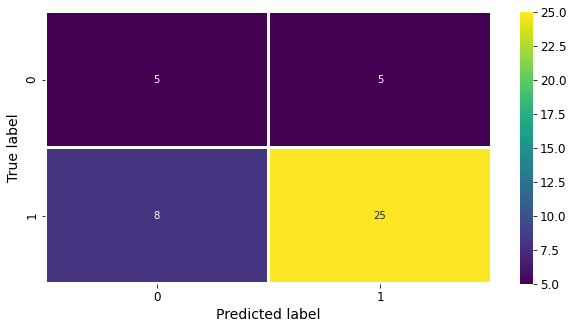

In [31]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        10
           1       0.83      0.76      0.79        33

    accuracy                           0.70        43
   macro avg       0.61      0.63      0.61        43
weighted avg       0.73      0.70      0.71        43



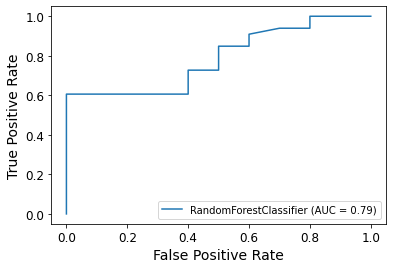

In [33]:
plot_roc_curve(rf,X_test_scaled,y_test)
plt.show()

### Plot Feature Importances

In [34]:
rf.feature_importances_

array([0.05550591, 0.09617141, 0.09031709, 0.13373969, 0.0550568 ,
       0.08797424, 0.05928983, 0.05537286, 0.10497222, 0.03391416,
       0.04068948, 0.05707724, 0.08153122, 0.04838784])

In [35]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)

In [36]:
feat_importances

incomeperperson         0.055506
alcconsumption          0.096171
armedforcesrate         0.090317
breastcancerper100th    0.133740
co2emissions            0.055057
femaleemployrate        0.087974
hivrate                 0.059290
internetuserate         0.055373
lifeexpectancy          0.104972
oilperperson            0.033914
relectricperperson      0.040689
suicideper100th         0.057077
employrate              0.081531
urbanrate               0.048388
dtype: float64

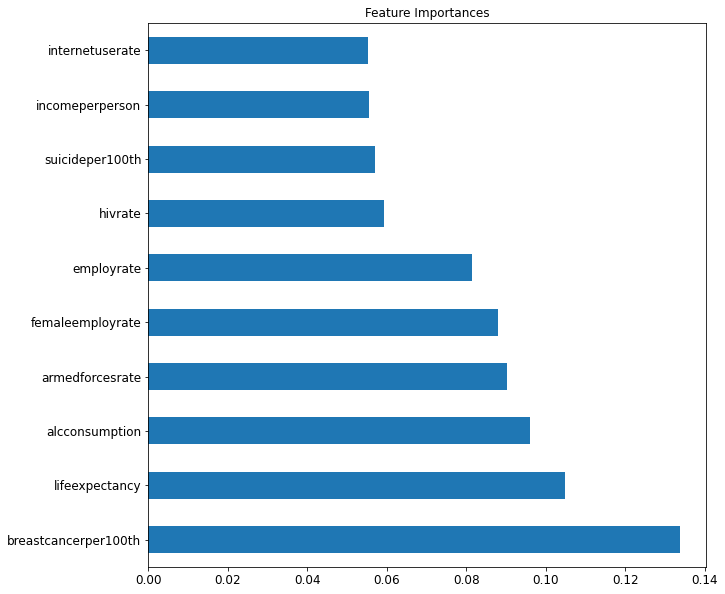

In [37]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances')
plt.show()

### Cross-Validation

In [38]:
cv = cross_val_score(rf,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [39]:
cv.mean()

0.7892580287929125

#### Python code done by Dennis Lam